<a href="https://colab.research.google.com/github/ilgarakkaya/Underwater-Image-Enchancement-Using-Sharpening-Methods/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
#connecting drive
from google.colab import drive
drive.mount('/content/drive')
#reading the dataset and printing
df = pd.read_csv('/content/drive/MyDrive/gait.csv')
df

Mounted at /content/drive


,subject,condition,replication,leg,joint,time,angle
0,1,1,1,1,1,0,4.682881
1,1,1,1,1,1,1,5.073127
2,1,1,1,1,1,2,5.229774
3,1,1,1,1,1,3,5.083273
4,1,1,1,1,1,4,4.652399
...,...,...,...,...,...,...,...
181795,10,3,10,2,3,96,29.778412
181796,10,3,10,2,3,97,29.247559
181797,10,3,10,2,3,98,28.796951
181798,10,3,10,2,3,99,28.432936


In [ ]:
df.duplicated().sum()

0

In [ ]:
#Data Split Y
y = df['angle']
y

0          4.682881
1          5.073127
2          5.229774
3          5.083273
4          4.652399
            ...    
181795    29.778412
181796    29.247559
181797    28.796951
181798    28.432936
181799    28.136438
Name: angle, Length: 181800, dtype: float64

In [ ]:
#Data Split X
x = df.drop('angle', axis= 1)
x

,subject,condition,replication,leg,joint,time
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,1,1,1,1,1,2
3,1,1,1,1,1,3
4,1,1,1,1,1,4
...,...,...,...,...,...,...
181795,10,3,10,2,3,96
181796,10,3,10,2,3,97
181797,10,3,10,2,3,98
181798,10,3,10,2,3,99


In [ ]:
#Data Split Test and Train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Model Linear Regression
reg = LinearRegression ()
reg.fit (x_train, y_train)
LinearRegression()

LinearRegression()

In [ ]:
#Model Training Linear Regression
y_reg_train_prd = reg.predict(x_train)
y_reg_test_prd = reg.predict(x_test)
print (y_reg_train_prd, y_reg_test_prd)

[15.57078102  9.8865378  11.1818962  ... 10.13846664 13.92250899
 12.66417682] [14.00810673 18.42145446 15.24624495 ... 10.18064627  3.12954861
 12.14968989]


In [ ]:
#Mean Square and ---
lr_train_mse = mean_squared_error(y_train,y_reg_train_prd)
lr_train_r2 = r2_score(y_train,y_reg_train_prd)
lr_train_rmse = mean_squared_error(y_train,y_reg_train_prd,squared = False)
lr_train_mae = mean_squared_error(y_train,y_reg_train_prd)

lr_test_mse = mean_squared_error(y_test,y_reg_test_prd)
lr_test_r2 = r2_score(y_test,y_reg_test_prd)
lr_test_rmse = mean_squared_error(y_test,y_reg_test_prd,squared = False)
lr_test_mae = mean_squared_error(y_test,y_reg_test_prd)

In [ ]:
#Printing the mse and r2
print ('LR MSE (Train):', lr_train_mse)
print ('LR R2 (Train):', lr_train_r2)
print ('LR MSE (Test):', lr_test_mse)
print ('LR R2 (Test):', lr_test_r2)
print ('LR RMSE (Train):', lr_train_rmse)
print ('LR RMSE (Test):', lr_test_rmse)
print ('LR MAE (Train):', lr_train_mae)
print ('LR MAE (Test):', lr_test_mae)


LR MSE (Train): 235.51174881498824
LR R2 (Train): 0.08230798869887479
LR MSE (Test): 236.87055482316651
LR R2 (Test): 0.08042901574922434
LR RMSE (Train): 15.346392045526148
LR RMSE (Test): 15.39059956022398
LR MAE (Train): 235.51174881498824
LR MAE (Test): 236.87055482316651


In [ ]:
rf = RandomForestRegressor (max_depth=2)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2)

In [ ]:
y_rf_train_prd = rf. predict(x_train)
y_rf_test_prd = rf. predict(x_test)
print (y_rf_train_prd, y_rf_test_prd)

[29.34681718  5.17457131  8.84379889 ...  9.78807714  8.01796946
  8.84379889] [29.34681718 29.34681718 29.34681718 ...  8.84379889  7.50178153
  7.50178153]


Text(0.5, 0, 'angle')

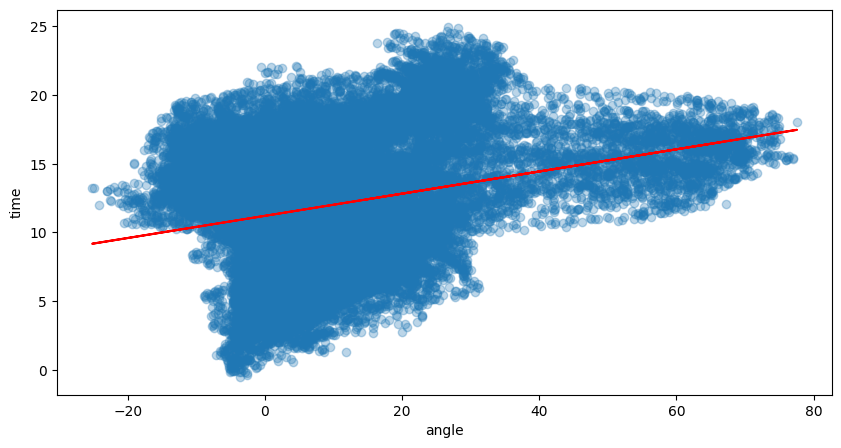

In [ ]:
#Data Visualizing
plt.figure(figsize=(10,5))
plt.scatter(x=y_test, y=y_reg_test_prd, alpha=0.3)
z= np.polyfit(y_test, y_reg_test_prd, 1)
p= np.poly1d(z)
plt.plot(y_test, p(y_test), c='red')
plt.ylabel('time')
plt.xlabel('angle')

In [ ]:
rf_train_mse = mean_squared_error (y_train, y_rf_train_prd)
rf_train_r2 = r2_score(y_train, y_rf_train_prd)
rf_train_rmse = mean_squared_error (y_train, y_rf_train_prd,squared = False)
rf_train_mae = mean_squared_error (y_train, y_rf_train_prd)

rf_test_mse = mean_squared_error (y_test, y_rf_test_prd)
rf_test_r2 = r2_score(y_test, y_rf_test_prd)
rf_test_rmse = mean_squared_error (y_test, y_rf_test_prd,squared = False)
rf_test_mae = mean_squared_error (y_test, y_rf_test_prd)


In [ ]:
print ('RF MSE (Train):', rf_train_mse)
print ('RF R2 (Train):', rf_train_r2)
print ('RF MSE (Test):', rf_test_mse)
print ('RF R2 (Test):', rf_test_r2)
print ('RF RMSE (Train):', rf_train_rmse)
print ('RF RMSE (Test):', rf_test_rmse)
print ('RF MAE (Train):', rf_train_mae)
print ('RF MAE (Test):', rf_test_mae)

RF MSE (Train): 159.03611980693915
RF R2 (Train): 0.3803019280799951
RF MSE (Test): 159.26779906416417
RF R2 (Test): 0.38169585133017025
RF RMSE (Train): 12.610952375095989
RF RMSE (Test): 12.620134669018558
RF MAE (Train): 159.03611980693915
RF MAE (Test): 159.26779906416417


Text(0.5, 0, 'angle')

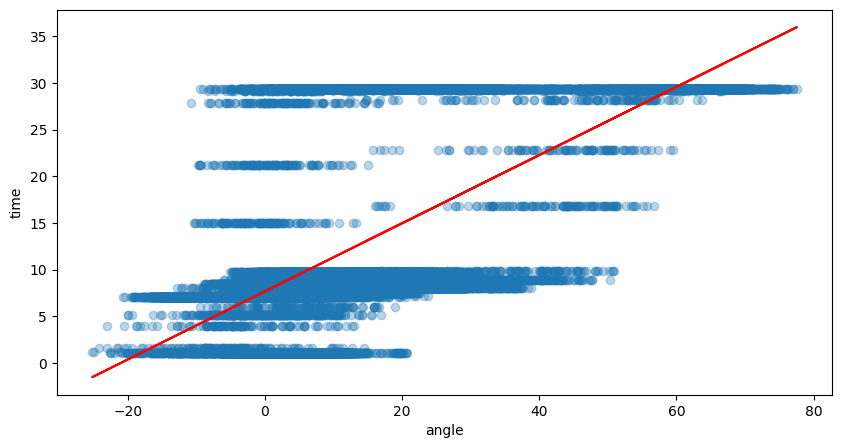

In [ ]:
#Data Visualizing
plt.figure(figsize=(10,5))
plt.scatter(x=y_test, y=y_rf_test_prd, alpha=0.3)
z= np.polyfit(y_test, y_rf_test_prd, 1)
p= np.poly1d(z)
plt.plot(y_test, p(y_test), c='red')
plt.ylabel('time')
plt.xlabel('angle')

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_dt_train_prd = dt.predict(x_train)
y_dt_test_prd = dt.predict(x_test)
print (y_dt_train_prd, y_dt_test_prd)

[70.37339506  5.74344678  7.86307491 ... 17.8854166  19.67405082
  9.14346656] [68.56328458 29.8949115  75.1919536  ...  8.8775196  -2.01194663
 13.75842746]


In [ ]:
dt_train_mse = mean_squared_error (y_train, y_dt_train_prd)
dt_train_r2 = r2_score(y_train, y_dt_train_prd)
dt_train_rmse = mean_squared_error (y_train, y_dt_train_prd,squared=False)
dt_train_mae = mean_squared_error (y_train, y_dt_train_prd)

dt_test_mse = mean_squared_error (y_test, y_dt_test_prd)
dt_test_r2 = r2_score(y_test, y_dt_test_prd)
dt_test_rmse = mean_squared_error (y_test, y_dt_test_prd,squared=False)
dt_test_mae = mean_squared_error (y_test, y_dt_test_prd)

In [ ]:
print ('DT MSE (Train):', dt_train_mse)
print ('DT R2 (Train):', dt_train_r2)
print ('DT MSE (Test):', dt_test_mse)
print ('DT R2 (Test):', dt_test_r2)
print ('DT RMSE (Train):', dt_train_rmse)
print ('DT RMSE (Test):', dt_test_rmse)
print ('DT MAE (Train):', dt_train_mae)
print ('DT MAE (Test):', dt_test_mae)

DT MSE (Train): 0.0
DT R2 (Train): 1.0
DT MSE (Test): 2.5384830516927375
DT R2 (Test): 0.9901451855842037
DT RMSE (Train): 0.0
DT RMSE (Test): 1.5932617649629133
DT MAE (Train): 0.0
DT MAE (Test): 2.5384830516927375


Text(0.5, 0, 'angle')

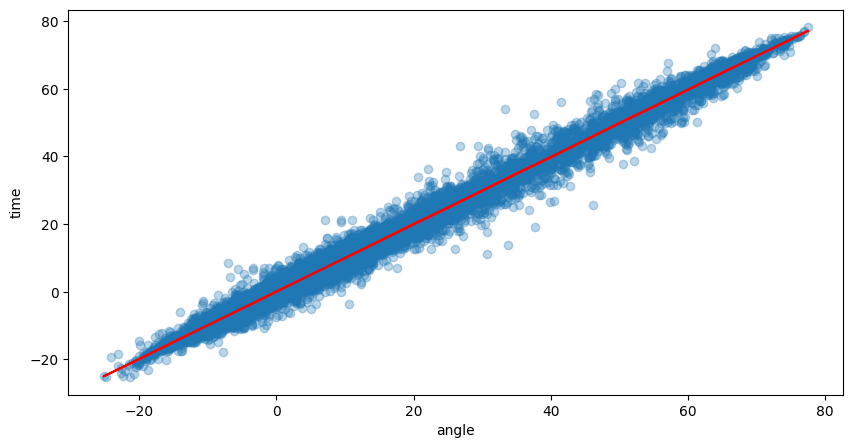

In [ ]:
#Data Visualizing
plt.figure(figsize=(10,5))
plt.scatter(x=y_test, y=y_dt_test_prd, alpha=0.3)
z= np.polyfit(y_test, y_dt_test_prd, 1)
p= np.poly1d(z)
plt.plot(y_test, p(y_test), c='red')
plt.ylabel('time')
plt.xlabel('angle')

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [ ]:
lasso_model = Lasso(alpha=0.1)  # alpha, düzenleme parametresidir (λ)
lasso_model.fit(x_train, y_train)
lasso_prd_test = lasso_model.predict(x_test)
lasso_prd_train = lasso_model.predict(x_train)


In [ ]:
lasso_train_mse = mean_squared_error (y_train, lasso_prd_train)
lasso_train_r2 = r2_score(y_train, lasso_prd_train)
lasso_train_rmse = mean_squared_error (y_train, lasso_prd_train,squared=False)
lasso_train_mae = mean_squared_error (y_train, lasso_prd_train)

lasso_test_mse = mean_squared_error (y_test, lasso_prd_test)
lasso_test_r2 = r2_score(y_test, lasso_prd_test)
lasso_test_rmse = mean_squared_error (y_test, lasso_prd_test,squared=False)
lasso_test_mae = mean_squared_error (y_test, lasso_prd_test)

In [ ]:
print ('Lasso MSE (Train):', lasso_train_mse)
print ('Lasso R2 (Train):', lasso_train_r2)
print ('Lasso MSE (Test):', lasso_test_mse)
print ('Lasso R2 (Test):', lasso_test_r2)
print ('Lasso RMSE (Train):', lasso_train_rmse)
print ('Lasso RMSE (Test):', lasso_test_rmse)
print ('Lasso MAE (Train):', lasso_train_mae)
print ('Lasso MAE (Test):', lasso_test_mae)

Lasso MSE (Train): 235.584276735776
Lasso R2 (Train): 0.08202537734789928
Lasso MSE (Test): 236.95701416894323
Lasso R2 (Test): 0.08009336615464757
Lasso RMSE (Train): 15.348754892035249
Lasso RMSE (Test): 15.393408140140481
Lasso MAE (Train): 235.584276735776
Lasso MAE (Test): 236.95701416894323


Text(0.5, 0, 'angle')

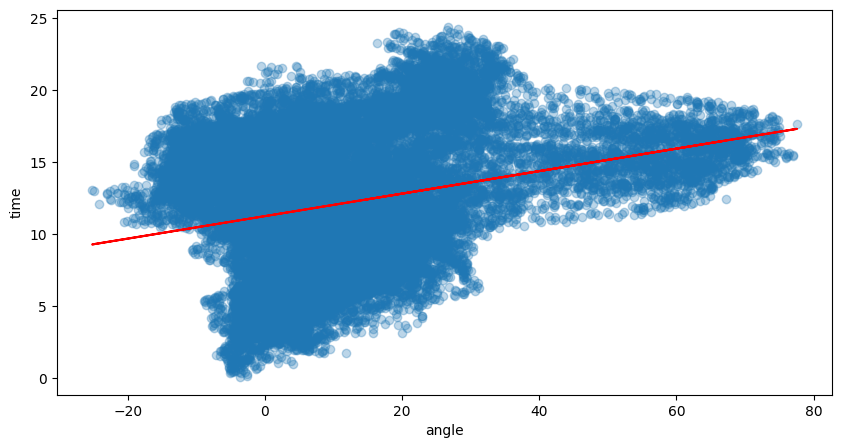

In [ ]:
#Data Visualizing
plt.figure(figsize=(10,5))
plt.scatter(x=y_test, y=lasso_prd_test, alpha=0.3)
z= np.polyfit(y_test, lasso_prd_test, 1)
p= np.poly1d(z)
plt.plot(y_test, p(y_test), c='red')
plt.ylabel('time')
plt.xlabel('angle')

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [ ]:
ridge_model = Ridge(alpha=0.1)  # alpha, düzenleme parametresidir (λ)
ridge_model.fit(x_train, y_train)
ridge_prd_test = ridge_model.predict(x_test)
ridge_prd_train = ridge_model.predict(x_train)

In [ ]:
ridge_train_mse = mean_squared_error (y_train, ridge_prd_train)
ridge_train_r2 = r2_score(y_train, ridge_prd_train)
ridge_train_rmse = mean_squared_error (y_train, ridge_prd_train,squared=False)
ridge_train_mae = mean_squared_error (y_train, ridge_prd_train)

ridge_test_mse = mean_squared_error (y_test, ridge_prd_test)
ridge_test_r2 = r2_score(y_test, ridge_prd_test)
ridge_test_rmse = mean_squared_error (y_test, ridge_prd_test,squared=False)
ridge_test_mae = mean_squared_error (y_test, ridge_prd_test)

In [ ]:
print ('Ridge MSE (Train):', ridge_train_mse)
print ('Ridge R2 (Train):', ridge_train_r2)
print ('Ridge MSE (Test):', ridge_test_mse)
print ('Ridge R2 (Test):', ridge_test_r2)
print ('Ridge RMSE (Train):', ridge_train_rmse)
print ('Ridge RMSE (Test):', ridge_test_rmse)
print ('Ridge MAE (Train):', ridge_train_mae)
print ('Ridge MAE (Test):', ridge_test_mae)


Ridge MSE (Train): 235.51174881500515
Ridge R2 (Train): 0.08230798869880895
Ridge MSE (Test): 236.87055494468567
Ridge R2 (Test): 0.08042901527746671
Ridge RMSE (Train): 15.346392045526699
Ridge RMSE (Test): 15.390599564171815
Ridge MAE (Train): 235.51174881500515
Ridge MAE (Test): 236.87055494468567


Text(0.5, 0, 'angle')

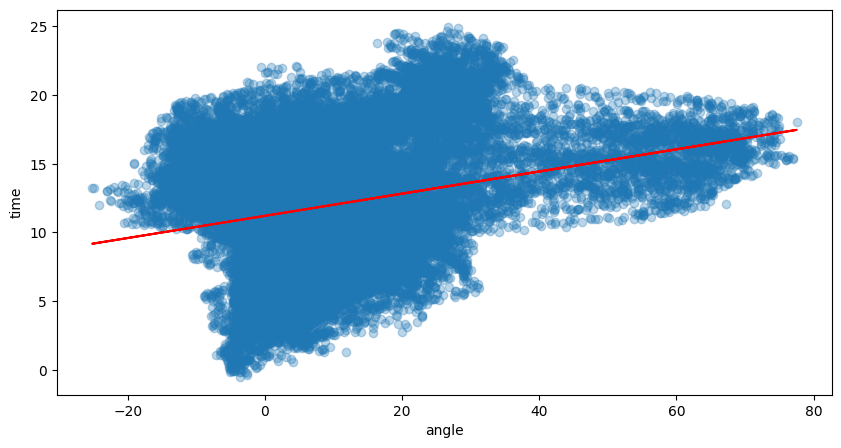

In [ ]:
#Data Visualizing
plt.figure(figsize=(10,5))
plt.scatter(x=y_test, y=ridge_prd_test, alpha=0.3)
z= np.polyfit(y_test, ridge_prd_test, 1)
p= np.poly1d(z)
plt.plot(y_test, p(y_test), c='red')
plt.ylabel('time')
plt.xlabel('angle')

In [ ]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline
import warnings #to remove the warnings
warnings.filterwarnings('ignore')
df.head()
df.describe()

,subject,condition,replication,leg,joint,time,angle
count,181800.000000,181800.000000,181800.000000,181800.000000,181800.000000,181800.00000,181800.000000
mean,5.500000,2.000000,5.500000,1.500000,2.000000,50.00000,12.149321
std,2.872289,0.816499,2.872289,0.500001,0.816499,29.15484,16.025823
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,-27.004634
25%,3.000000,1.000000,3.000000,1.000000,1.000000,25.00000,1.794457
50%,5.500000,2.000000,5.500000,1.500000,2.000000,50.00000,9.466976
75%,8.000000,3.000000,8.000000,2.000000,3.000000,75.00000,18.559890
max,10.000000,3.000000,10.000000,2.000000,3.000000,100.00000,78.309342


In [ ]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Connecting drive
from google.colab import drive
drive.mount('/content/drive')

# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/gait.csv')

# Print first few rows of the dataframe
print(df.head())

# Drop rows with any missing values
df = df.dropna()

# Create a target column based on 'angle' thresholds (this is just a placeholder example)
df['target'] = pd.cut(df['angle'], bins=[-np.inf, 4.5, 5.0, np.inf], labels=['low', 'medium', 'high'])

# Drop rows with missing target values (if any)
df = df.dropna(subset=['target'])

# Split dataset into features (X) and target (y)
X = df.drop(columns=['target'])  # Drop the target column from features
y = df['target']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print(f"Decision Tree Accuracy: {accuracy_tree}")
print("Decision Tree Classification Report:")
print(report_tree)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_tree)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   subject  condition  replication  leg  joint  time     angle
0        1          1            1    1      1     0  4.682881
1        1          1            1    1      1     1  5.073127
2        1          1            1    1      1     2  5.229774
3        1          1            1    1      1     3  5.083273
4        1          1            1    1      1     4  4.652399
Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00     23887
         low       1.00      1.00      1.00     11918
      medium       1.00      1.00      1.00       555

    accuracy                           1.00     36360
   macro avg       1.00      1.00      1.00     36360
weighted avg       1.00      1.00      1.00     36360

Decision Tree Confusion Matrix:
[[23887     0  

In [ ]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Connecting drive
from google.colab import drive
drive.mount('/content/drive')

# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/gait.csv')

# Fill missing values with the mean of the column
df = df.fillna(df.mean())

# Create a target column based on 'angle' thresholds
df['target'] = pd.cut(df['angle'], bins=[-np.inf, 4.5, 5.0, np.inf], labels=['low', 'medium', 'high'])

# Drop rows with missing target values (if any)
df = df.dropna(subset=['target'])

# Split dataset into features (X) and target (y)
X = df.drop(columns=['target'])  # Drop the target column from features
y = df['target']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Random Forest model
rfc = RandomForestClassifier(n_estimators=150, random_state=42, criterion = 'gini')
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

# Evaluate the Random Forest model
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
report_rfc = classification_report(y_test, y_pred_rfc)
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

print(f"Random Forest Accuracy: {accuracy_rfc}")
print("Random Forest Classification Report:")
print(report_rfc)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rfc)

# Cross-validation
cv_scores = cross_val_score(rfc, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00     23903
         low       1.00      1.00      1.00     11886
      medium       1.00      1.00      1.00       571

    accuracy                           1.00     36360
   macro avg       1.00      1.00      1.00     36360
weighted avg       1.00      1.00      1.00     36360

Random Forest Confusion Matrix:
[[23903     0     0]
 [    0 11886     0]
 [    0     0   571]]
Cross-Validation Scores: [0.9999725  0.9999725  0.9999725  0.99994499 1.        ]
Mean CV Score: 0.9999724972497249


In [ ]:
import numpy as np
import pandas as pd

# Veri setinizi yükleyin
df = pd.read_csv('/content/drive/MyDrive/gait.csv')

# Data augmentation uygulama fonksiyonları
def add_noise(data, noise_level=0.01):
    noise = noise_level * np.random.randn(*data.shape)
    return data + noise

def augment_data(df, augmentations=1):
    augmented_data = df.copy()
    for _ in range(augmentations):
        noisy_data = df.copy()
        numeric_columns = df.select_dtypes(include=[np.number]).columns
        for column in numeric_columns:
            noisy_data[column] = add_noise(df[column].values)
        augmented_data = pd.concat([augmented_data, noisy_data])
    return augmented_data

# Veri setini augment etme
augmented_df = augment_data(df, augmentations=5)  # Orijinal veri setini 5 kat artır

# Augmented veri setinin boyutunu kontrol etme
print("Original data size:", len(df))
print("Augmented data size:", len(augmented_df))


Original data size: 181800
Augmented data size: 1090800


In [ ]:
import numpy as np
import pandas as pd

# Veri setinizi yükleyin
df = pd.read_csv('/content/drive/MyDrive/gait.csv')

# Data augmentation uygulama fonksiyonları
def add_noise(data, noise_level=0.01):
    noise = noise_level * np.random.randn(*data.shape)
    return data + noise

def augment_data(df, augmentations=1, percentage=0.5):
    augmented_data = df.copy()
    sample_size = int(len(df) * percentage)
    for _ in range(augmentations):
        sample = df.sample(n=sample_size)
        noisy_data = sample.copy()
        numeric_columns = df.select_dtypes(include=[np.number]).columns
        for column in numeric_columns:
            noisy_data[column] = add_noise(sample[column].values)
        augmented_data = pd.concat([augmented_data, noisy_data])
    return augmented_data

# Veri setini augment etme
augmented_df = augment_data(df, augmentations=2, percentage=0.2)  # Orijinal veri setinin %20'sini 2 kat artır

# Augmented veri setinin boyutunu kontrol etme
print("Original data size:", len(df))
print("Augmented data size:", len(augmented_df))


Original data size: 181800
Augmented data size: 254520


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Veri setinizi yükleyin
df = pd.read_csv('/content/drive/MyDrive/gait.csv')

# Data augmentation uygulama fonksiyonları
def add_noise(data, noise_level=0.01):
    noise = noise_level * np.random.randn(*data.shape)
    return data + noise

def augment_data(df, augmentations=1, percentage=0.5):
    augmented_data = df.copy()
    sample_size = int(len(df) * percentage)
    for _ in range(augmentations):
        sample = df.sample(n=sample_size)
        noisy_data = sample.copy()
        numeric_columns = df.select_dtypes(include=[np.number]).columns
        for column in numeric_columns:
            noisy_data[column] = add_noise(sample[column].values)
        augmented_data = pd.concat([augmented_data, noisy_data])
    return augmented_data

# Veri setini augment etme
augmented_df = augment_data(df, augmentations=2, percentage=0.2)  # Orijinal veri setinin %20'sini 2 kat artır

# Veri setini örnekleyelim
X = augmented_df.drop(columns=['angle'])  # 'angle' sütunu hariç tut
y = augmented_df['angle']  # 'angle' sütunu hedef değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge regresyon modeli oluşturma
ridge_model = Ridge(alpha=0.1, random_state=42)  # alpha: Regularization parametresi

# Modeli eğitme
ridge_model.fit(X_train_scaled, y_train)

# Test seti ile tahmin yapma
y_pred = ridge_model.predict(X_test_scaled)

# Modelin performansını değerlendirme
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 235.7120540975458
R2 Score: 0.07993125773263521


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hiperparametre tuning için Grid Search
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv.fit(X_train_scaled, y_train)
print("Best alpha parameter:", ridge_cv.best_params_)
print("Best R2 Score:", ridge_cv.best_score_)

ValueError: Found input variables with inconsistent numbers of samples: [203616, 50904]

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest modelini oluştur ve eğit
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

# Gradient Boosting modelini oluştur ve eğit
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
print("Gradient Boosting Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting R2 Score:", r2_score(y_test, y_pred_gb))


Random Forest Mean Squared Error: 1.5835549444359491
Random Forest R2 Score: 0.9938188167269736
Gradient Boosting Mean Squared Error: 37.50451959347159
Gradient Boosting R2 Score: 0.8536063999619338


In [ ]:
pip install autogluon.tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:

import pandas as pd

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/gait.csv')

# Split into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Assuming the target variable is named 'label'
label = 'angle'

from autogluon.tabular import TabularPredictor

# Specify the column name of the target variable and the path to save the model
predictor = TabularPredictor(label=label, path='ag_models/').fit(train_data)
# Evaluate the model's performance
performance = predictor.evaluate(test_data)
print(performance)
# Make predictions on the test set
predictions = predictor.predict(test_data.drop(columns=[label]))
print(predictions)
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/gait.csv')

# Split into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Specify the target variable
label = 'angle'

# Train the model
predictor = TabularPredictor(label=label, path='ag_models/').fit(train_data)

# Evaluate the model
performance = predictor.evaluate(test_data)
print(performance)

# Make predictions on the test set
predictions = predictor.predict(test_data.drop(columns=[label]))
print(predictions)
import pandas as pd
from autogluon.tabular import TabularPredictor

# Assuming you have already trained your model and have the results
# Let's say the predictor is stored in a variable called predictor

# Load the leaderboard
leaderboard = predictor.leaderboard(silent=True)

# Convert the leaderboard to a pandas DataFrame
leaderboard_df = pd.DataFrame(leaderboard)

# Display the DataFrame as a table
print(leaderboard_df)

# Optionally, save the table to a CSV file
leaderboard_df.to_csv('autogluon_leaderboard.csv', index=False)




ImportError: cannot import name '_is_pandas_df' from 'sklearn.utils' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv('/content/drive/MyDrive/gait.csv')

#Data Split Y
y = data['angle']
x = data.drop('angle', axis= 1)
#Data Split Test and Train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Split into train and test sets

# Modeli tanımla
dt = DecisionTreeRegressor()

# Hiperparametre ızgarasını tanımla
param_grid = {
    'max_depth': [None, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [2,5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'random_state': [None, 42],
}

# Grid search kur
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Modeli eğit
grid_search.fit(x_train, y_train)

# En iyi parametreleri al
best_params = grid_search.best_params_
print("En iyi parametreler: ", best_params)

# En iyi modeli al
best_model = grid_search.best_estimator_

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
decision_tree = DecisionTreeRegressor()
ridge_stack = Ridge(alpha=100)

# Define the stacking regressor
estimators = [
    ('decision_tree', decision_tree),
    ('random_forest', ridge_stack)
]

stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Train the stacking regressor
stacking_regressor.fit(x_train, y_train)

# Make predictions
y_pred = stacking_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error (y_test, y_pred,squared=False)
mae = mean_squared_error (y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')